# 对于新冠肺炎SEIR模型的改进

*——以细化参数为出发点*

## 疫情真实数据

          id  confirmedCount  confirmedIncr  curedCount  curedIncr  \
14099  14100           84729             58       79906          3   
14100  14101           84778             49       79913          7   
14101  14102           84823             45       79922          9   
14102  14103           84867             44       79926          4   
14103  14104           84903             36       79944         18   

       currentConfirmedCount  currentConfirmedIncr    dateId  deadCount  \
14099                    178                    55  20200613       4645   
14100                    220                    42  20200614       4645   
14101                    256                    36  20200615       4645   
14102                    296                    40  20200616       4645   
14103                    314                    18  20200617       4645   

       deadIncr  suspectedCount  suspectedCountIncr countryName  \
14099         0            1827                  19          

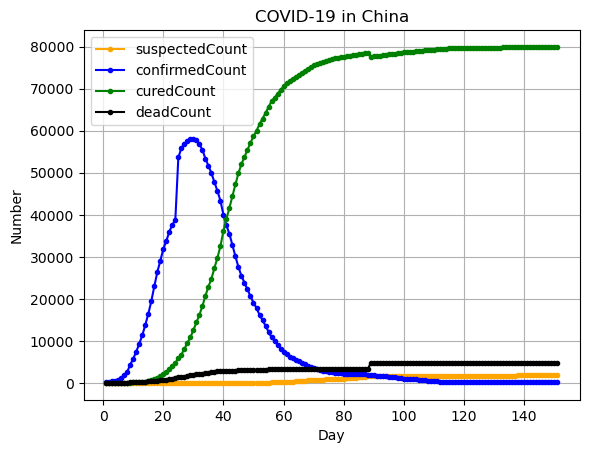

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#读取数据
data = pd.read_csv('countrydata.csv')


#数据预处理
data=data[data['countryName']=='中国']
time=list(range(1,len(data)+1))
print(data.tail())

#绘制图像
plt.figure()
plt.plot(time,data['suspectedCount'],color='orange',label='suspectedCount',marker='.')
plt.plot(time,data['currentConfirmedCount'],color='blue',label='confirmedCount',marker='.')
plt.plot(time,data['curedCount'],color='green',label='curedCount',marker='.')
plt.plot(time,data['deadCount'],color='black',label='deadCount',marker='.')

plt.title('COVID-19 in China')
plt.xlabel('Day')
plt.ylabel('Number')
plt.legend()
plt.grid()
plt.show()

## 1.SEIR基本模型

### 1.1 SEIR模型的基本假设

![alt SEIR](SEIR.png "SEIR模型基本假设")

### 1.2 SEIR模型的微分方程

![alt SEIR](SEIRcalc.png "SERI模型微分方程")

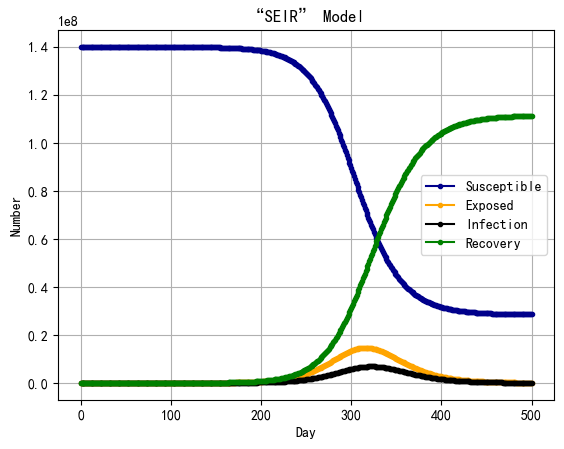

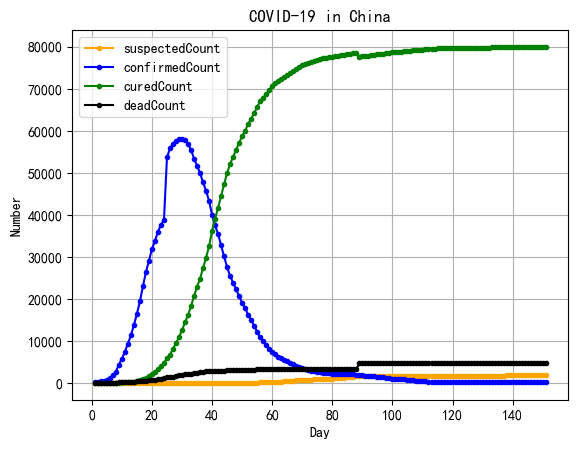

In [5]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt


# N为人群总数
N =140000000 #（中国·人口）
# β为传染率系数
beta = 0.3 #β为传染率系数
# gamma为恢复率系数
gamma = 0.15

# Te为疾病潜伏期
Te = 14

# E_0为潜伏者的初始人数
E_0 = 100
#infected 人数
I_0 =100
# R_0为治愈者的初始人数
R_0 = 0
# S_0为易感者的初始人数
S_0 = N - E_0 - I_0 - R_0
# T为传播时间
T = 500

# INI为初始状态下的数组
INI = (S_0,E_0,I_0,R_0)

#微分方程:含有未知函数及其导数的关系式，解微分方程就是找出未知函数。
#_ 可以表示某个临时变量或者无关紧要的变量
#x[1]暴露人数 x[0]S人数 疑似和感染X[1]+X[2]
#x[2]感染人数

#注：函数中的下划线表示忽略特定的值，但是有2个参数，与后面求解对应
def funcSEIR(inivalue,_):
    Y = np.zeros(4) #SEIR的各类人群人数
    X = inivalue
    # 易感个体变化
    Y[0] = - (beta * X[0] *( X[2])) / N
    # 潜伏个体变化
    Y[1] = (beta * X[0] *( X[2])) / N - X[1] / Te
    # 感染
    Y[2] = X[1] / Te- gamma* X[2]
    # 治愈
    Y[3] = gamma * X[2]
    return Y

T_range = np.arange(0,T + 1)
#类似np.range函数，但np.arange()返回的是numpy.ndarray()
#odeint()函数是scipy库中一个数值求解微分方程的函数
#odeint()函数需要至少三个参数，第一个是微分方程函数，
#第二个是微分方程初值，
#第三个是微分的自变量。
RES = spi.odeint(funcSEIR,INI,T_range)
plt.figure()
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(RES[:,2],color = 'black',label = 'Infection',marker = '.')
plt.plot(RES[:,3],color = 'green',label = 'Recovery',marker = '.')


plt.title('“SEIR” Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.grid()
plt.show ()

#读取数据
data = pd.read_csv('countrydata.csv')

#数据预处理
data=data[data['countryName']=='中国']
time=list(range(1,len(data)+1))

#绘制图像
plt.figure()
plt.plot(time,data['suspectedCount'],color='orange',label='suspectedCount',marker='.')
plt.plot(time,data['currentConfirmedCount'],color='blue',label='confirmedCount',marker='.')
plt.plot(time,data['curedCount'],color='green',label='curedCount',marker='.')
plt.plot(time,data['deadCount'],color='black',label='deadCount',marker='.')

plt.title('COVID-19 in China')
plt.xlabel('Day')
plt.ylabel('Number')
plt.legend()
plt.grid()
plt.show()

## 对SEIR模型的改进

### 1.引入“正在治疗的患者”变量，即SEITR模型

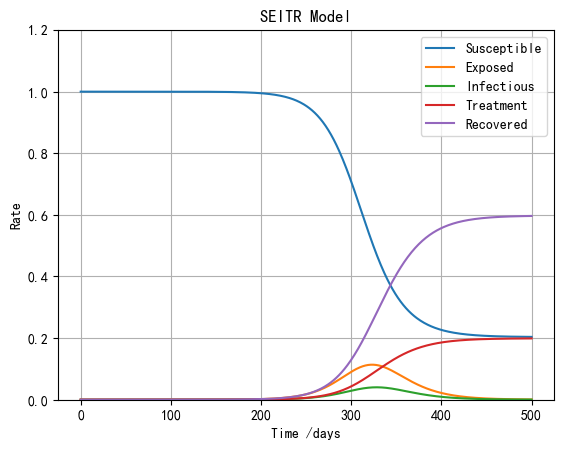

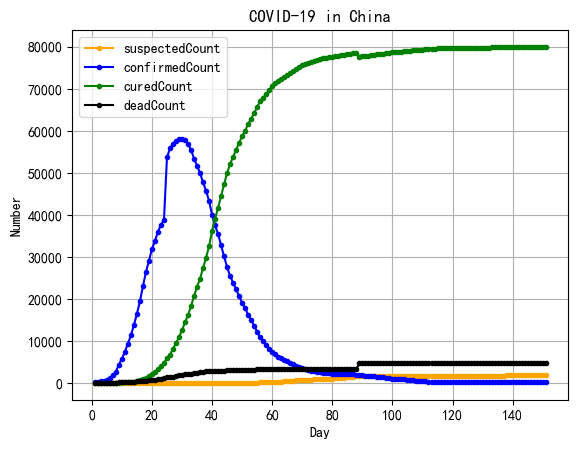

In [91]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 定义微分方程
def deriv(y, t, N, beta, gamma, delta, alpha):
    S, E, I, T, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - alpha * I - gamma * I
    dTdt = alpha * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dTdt, dRdt
# N为人群总数
N =33000000

# T为传播时间
T = 300
I0 = 1 # 初始感染人数
E0 = 10 # 初始暴露人数
T0 = 0 # 初始治疗人数
R0 = 0 # 初始康复人数
S0 = N - I0 - E0 - T0 - R0 # 初始易感人数

beta = 0.4 # 感染率
gamma = 0.15 # 康复率
delta = 1.0 / 14.0 # 潜伏期倒数，即潜伏期为14天
alpha = 0.05 # 治疗率

# 时间点（天）
t = np.linspace(0, 500, 500)

# 初始状态向量
y0 = S0, E0, I0, T0, R0

# 求解微分方程组
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta,alpha))
S, E, I,T,R= ret.T

# 绘制结果图像
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.plot(t,S/N,label='Susceptible')
ax.plot(t,E/N,label='Exposed')
ax.plot(t,I/N,label='Infectious')
ax.plot(t,T/N,label='Treatment')
ax.plot(t,R/N,label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Rate')
ax.set_ylim(0,1.2)
plt.title("SEITR Model")
legend=ax.legend()
plt.grid()
plt.show()

#读取数据
data = pd.read_csv('countrydata.csv')

#数据预处理
data=data[data['countryName']=='中国']
time=list(range(1,len(data)+1))

#绘制图像
plt.figure()
plt.plot(time,data['suspectedCount'],color='orange',label='suspectedCount',marker='.')
plt.plot(time,data['currentConfirmedCount'],color='blue',label='confirmedCount',marker='.')
plt.plot(time,data['curedCount'],color='green',label='curedCount',marker='.')
plt.plot(time,data['deadCount'],color='black',label='deadCount',marker='.')

plt.title('COVID-19 in China')
plt.xlabel('Day')
plt.ylabel('Number')
plt.legend()
plt.grid()
plt.show()

### 2.考虑潜伏期传染性的SEIR模型

![alt infectSEIR](infectSEIR.png "考虑潜伏期传染性的SEIR模型")

lamda=1.0	mu=0.05	sigma=20.0	(1-1/sig)=0.95


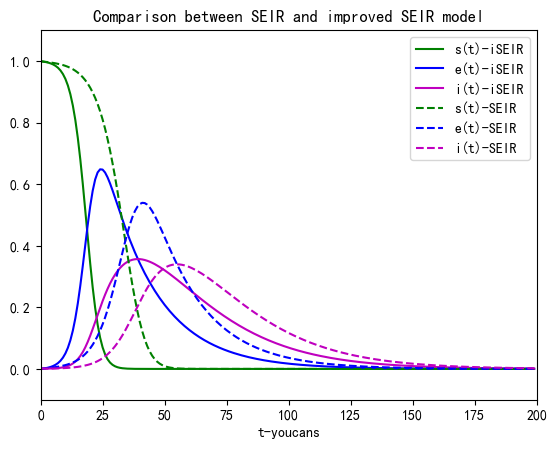

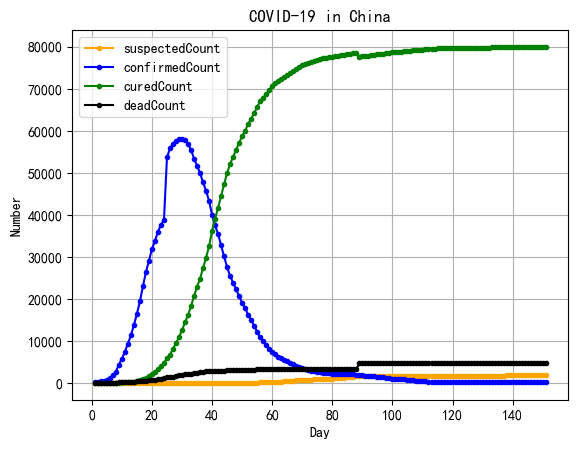

In [87]:
from scipy.integrate import odeint  # 导入 scipy.integrate 模块
import numpy as np  # 导入 numpy包
import matplotlib.pyplot as plt  # 导入 matplotlib包

def dySEIR(y, t, lamda, delta, mu):  # SEIR 模型，导数函数
    s, e, i = y
    ds_dt = - lamda*s*i  # ds/dt = -lamda*s*i
    de_dt = lamda*s*i - delta*e  # de/dt = lamda*s*i - delta*e
    di_dt = delta*e - mu*i  # di/dt = delta*e - mu*i
    return np.array([ds_dt,de_dt,di_dt])

def dySEIR2(y, t, lamda, lam2, delta, mu):  # SEIR2 模型，导数函数
    s, e, i = y
    ds_dt = - lamda*s*i - lam2*s*e # ds/dt = -lamda*s*i - lam2*s*e
    de_dt = lamda*s*i + lam2*s*e - delta*e  # de/dt = lamda*s*i - delta*e
    di_dt = delta*e - mu*i  # di/dt = delta*e - mu*i
    return np.array([ds_dt,de_dt,di_dt])

# 设置模型参数
number = 1e5  # 总人数
lamda = 1.0  # 日接触率, 患病者每天有效接触的易感者的平均人数
lam2 = 0.25  # 日接触率2, 潜伏者每天有效接触的易感者的平均人数
delta = 0.05  # 日发病率，每天发病成为患病者的潜伏者占潜伏者总数的比例
mu = 0.05  # 日治愈率, 每天治愈的患病者人数占患病者总数的比例
sigma = lamda / mu  # 传染期接触数
fsig = 1-1/sigma
tEnd = 200  # 预测日期长度
t = np.arange(0.0, tEnd, 1)  # (start,stop,step)
i0 = 1e-3  # 患病者比例的初值
e0 = 0  # 潜伏者比例的初值
s0 = 1-i0  # 易感者比例的初值
Y0 = (s0, e0, i0)  # 微分方程组的初值

# odeint 数值解，求解微分方程初值问题
ySEIR = odeint(dySEIR, Y0, t, args=(lamda,delta,mu))  # SEIR 模型
ySEIR2 = odeint(dySEIR2, Y0, t, args=(lamda,lam2,delta,mu))  # SEIR2 模型

# 输出绘图
print("lamda={}\tmu={}\tsigma={}\t(1-1/sig)={}".format(lamda,mu,sigma,fsig))
plt.title("Comparison between SEIR and improved SEIR model")
plt.xlabel('t-youcans')
plt.axis([0, tEnd, -0.1, 1.1])

plt.plot(t, ySEIR2[:,0], '-g', label='s(t)-iSEIR')  # 易感者比例
plt.plot(t, ySEIR2[:,1], '-b', label='e(t)-iSEIR')  # 潜伏者比例
plt.plot(t, ySEIR2[:,2], '-m', label='i(t)-iSEIR')  # 患病者比例
# plt.plot(t, 1-ySEIR2[:,0]-ySEIR2[:,1]-ySEIR2[:,2], '-b', label='r(t)-iSEIR')
plt.plot(t, ySEIR[:,0], '--g', label='s(t)-SEIR')
plt.plot(t, ySEIR[:,1], '--b', label='e(t)-SEIR')
plt.plot(t, ySEIR[:,2], '--m', label='i(t)-SEIR')
# plt.plot(t, 1-ySEIR[:,0]-ySEIR[:,1]-ySEIR[:,2], '--m', label='r(t)-SEIR')
plt.legend(loc='upper right')  # youcans
plt.show()

#读取数据
data = pd.read_csv('countrydata.csv')

#数据预处理
data=data[data['countryName']=='中国']
time=list(range(1,len(data)+1))

#绘制图像
plt.figure()
plt.plot(time,data['suspectedCount'],color='orange',label='suspectedCount',marker='.')
plt.plot(time,data['currentConfirmedCount'],color='blue',label='confirmedCount',marker='.')
plt.plot(time,data['curedCount'],color='green',label='curedCount',marker='.')
plt.plot(time,data['deadCount'],color='black',label='deadCount',marker='.')

plt.title('COVID-19 in China')
plt.xlabel('Day')
plt.ylabel('Number')
plt.legend()
plt.grid()
plt.show()

### 3.考虑复感染可能性的SEIRS模型

#### 3.1 SEIRS模型概述

SEIRS对四个状态之间的人员流动进行建模：易感性（S），暴露性（E），受感染（I）和抵抗性（R）。这些变量中的每一个都代表这些组中的人数。参数alpha和beta部分控制了人们从易受感染（beta），受感染（sigma）和受感染到耐药（gamma）的移动速度。该模型有两个附加参数：一个是不受疾病状态影响的背景死亡率（mu），另一个是疫苗接种（nu）。疫苗接种使人们从易感性直接变成了抗药性，而不会被暴露或感染。

SEIRS与SEIR模型的不同之处在于，让恢复的个体随时间失去抵抗力。人们感染的速度由参数rho决定。

参数：

Beta 该参数控制易感性感染导致新接触的频率。

Gamma 感染率恢复并进入耐药阶段。

Sigma 受感染者的感染率。

Mu 自然死亡率（与疾病无关）。这可以模拟恒定大小的人口，

Nu 易感者接种疫苗的速度。

Rho 抗药性人群失去抗药性并再次变得易感的比率。

最初易感 模型运行开始时易感个体的数量。

初始暴露 模型运行开始时的暴露人员数。

最初感染 模型开始运行时被感染的人数。

最初恢复 模型运行开始时恢复的个人数量。

D(天) 控制模型将运行多长时间。

#### 3.2 SEIRS模型微分方程
![alt SEIRS](SEIRScalc.png "SEIRS微分方程")

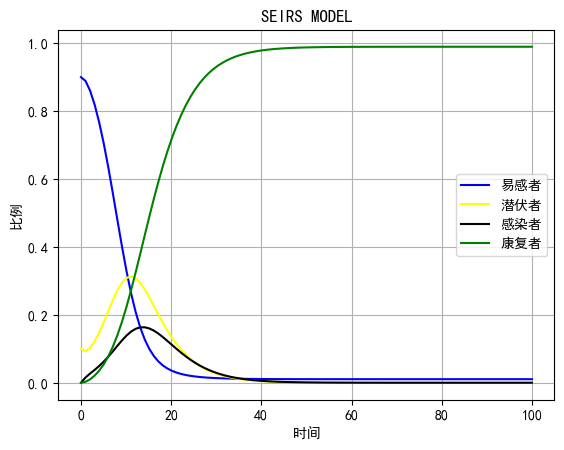

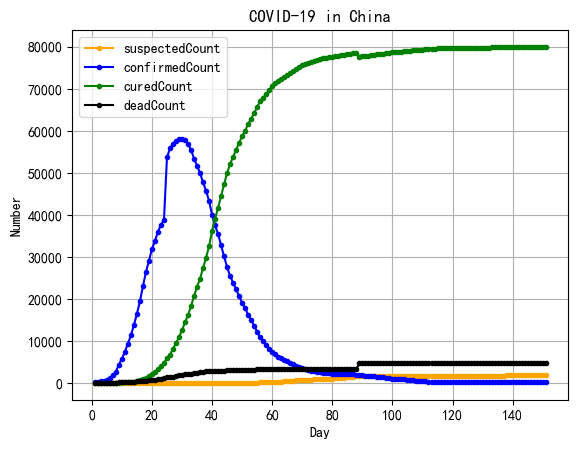

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 定义 SEIRS 模型
def seirs_model(y, t, beta, gamma, sigma, mu):
    S, E, I, R = y
    dSdt = -beta * S * I + mu * R
    dEdt = beta * S * I - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I - mu * R
    return [dSdt, dEdt, dIdt, dRdt]

# 初始条件
S0 = 0.9
E0 = 0.1
I0 = 0.0
R0 = 0.0

# 时间点
t = np.linspace(0, 100, 100)

# 参数值
beta = 1.5
gamma = 1/3
sigma = 1/5.2
mu = 0

# 解 ODEs
y0 = [S0, E0, I0, R0]
sol = odeint(seirs_model, y0, t, args=(beta, gamma, sigma, mu))
S, E, I, R = sol.T

# 绘图
plt.figure()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(t, S, 'blue', label='易感者')
plt.plot(t, E, 'yellow', label='潜伏者')
plt.plot(t, I, 'black', label='感染者')
plt.plot(t, R, 'green', label='康复者')
plt.legend(loc='best')
plt.xlabel('时间')
plt.ylabel('比例')
plt.grid()
plt.title("SEIRS MODEL")
plt.show()

#读取数据
data = pd.read_csv('countrydata.csv')

#数据预处理
data=data[data['countryName']=='中国']
time=list(range(1,len(data)+1))

#绘制图像
plt.figure()
plt.plot(time,data['suspectedCount'],color='orange',label='suspectedCount',marker='.')
plt.plot(time,data['currentConfirmedCount'],color='blue',label='confirmedCount',marker='.')
plt.plot(time,data['curedCount'],color='green',label='curedCount',marker='.')
plt.plot(time,data['deadCount'],color='black',label='deadCount',marker='.')

plt.title('COVID-19 in China')
plt.xlabel('Day')
plt.ylabel('Number')
plt.legend()
plt.grid()
plt.show()

## 真实应用的SEIR模型

![alt modifiedSEIR](modifiedmodel.png "modifiedSEIR微分方程")

![alt modifiedSEIR](modifiedcalc.png "modifiedSEIR微分方程")

![alt modifiedSEIR](modifiedpara.png "modifiedSEIR微分方程")

![alt modifiedresult](modifiedresult.png "modifiedSEIR结果")

## 参考文献
[Python小白的数学建模课-B6. 新冠疫情 SEIR 改进模型](https://zhuanlan.zhihu.com/p/390336164)

Yang, Zifeng, Zhiqi Zeng, Ke Wang, Sook-San Wong, Wenhua Liang, Mark Zanin, Peng Liu, Xudong Cao, Zhongqiang Gao, Zhitong Mai, Jingyi Liang, Xiaoqing Liu, Shiyue Li, Yimin Li, Feng Ye, Weijie Guan, Yifan Yang, Fei Li, Shengmei Luo, Yuqi Xie, Bin Liu, Zhoulang Wang, Shaobo Zhang, Yaonan Wang, Nanshan Zhong, and Jianxing He. "Modified SEIR and AI Prediction of the Epidemics Trend of COVID-19 in China under Public Health Interventions." Journal of Thoracic Disease 12.3 (2020): 165-74. Web.